# Proto-historic navigation performance data: exploratory work
> Author: Matteo Tomasini

In this script I simply explore a few concepts to attempt to explore data. This notebook helps me also test snippets of code that are then transferred to the `processing.py` and `plotting.py` files. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
full_data_1 = pd.read_csv("./CSV_Data/000000_013.n2kdecoded.csv", encoding='windows-1252')
full_data_2 = pd.read_csv("./CSV_Data/000000_014.n2kdecoded.csv", encoding='windows-1252')
full_data = pd.concat([full_data_1, full_data_2], ignore_index=True)
full_data["Name"].unique()


array(['Vessel Heading', 'Position, Rapid Update',
       'Speed, Water Referenced', 'Wind Data'], dtype=object)

In [3]:
# Add to processing to split data. dropna is there to drop all columns not pertaining to that type of data
vessel_heading = full_data[full_data["Name"] == "Vessel Heading"].dropna(axis=1)
speed_water_ref = full_data[full_data["Name"] == "Speed, Water Referenced"].dropna(axis=1)
position = full_data[full_data["Name"] == "Position, Rapid Update"].dropna(axis=1)
wind_data = full_data[full_data["Name"] == "Wind Data"].dropna(axis=1)

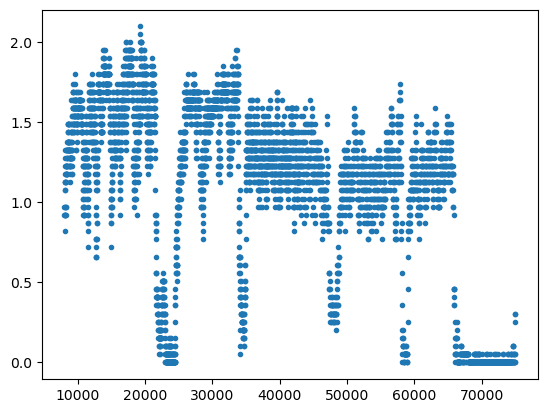

In [4]:
plt.plot(speed_water_ref["Speed Water Referenced"].loc[8000:75000], '.')

In [5]:
import movingpandas
# import hvplot.pandas 
import matplotlib.pyplot as plt
from processing import coordinate_conversion
from datetime import datetime, timedelta
import hvplot.pandas
from holoviews import opts, dim
import cartopy

In [6]:
position['Converted Lat'] = position['Latitude'].apply(lambda x: coordinate_conversion(x))
position['Converted Lon'] = position['Longitude'].apply(lambda x: coordinate_conversion(x))
position['Converted Time'] = position['Time'].apply(lambda x: pd.to_datetime(x))
#position['Converted Time'] = position['Time'].apply(lambda x: x.replace(day=5, month=9))

In [7]:
position_stripped = position[['Converted Time', 'Converted Lat', 'Converted Lon']]

In [8]:
trajectories = movingpandas.Trajectory(position_stripped, traj_id = 'logboat', t='Converted Time', x='Converted Lon', y='Converted Lat', crs="EPSG:4326")
trajectories = movingpandas.MinTimeDeltaGeneralizer(trajectories).generalize(tolerance=timedelta(seconds=5))

In [9]:
# plot_defaults = {'linewidth':5, 'capstyle':'round', 'figsize':(9,3), 'legend':True}
opts.defaults(opts.Overlay(active_tools=['wheel_zoom'], frame_width=500, frame_height=500))
hvplot_defaults = {'cmap':'Viridis', 'colorbar':True, 'figsize':(5,4)}

In [10]:
#trajectories.to_crs({'init': 'epsg:4326'}).hvplot(title="Trajectories with current speed (m/s)", geo=True, c='speed')

In [13]:
from plotting import plot_trajectory
plot_trajectory(position, with_speed=True, seconds_binning=10)

Launching server at http://localhost:46659
